In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [6]:
def True_length(x,y):
    '''
    This calculates the True lengths of the cables, for any given X and Y the geometric cable
    lengths will not be correct because of the spring stretch. This calculates the cable length
    that will stretch to the X and Y position.

    Y has to be above 1 or the cables cannot reach that position.

    The sympy solver is very slow it would be more efficent to use numpy,
    however this only has to be run once to get the lengths so the convience of this slow
    algebric solver is ok.
    '''
    k=10
    h=20
    m=1.0
    Fy = np.array([[k*y/np.sqrt(x**2 + y**2), k*y/np.sqrt(y**2 + (h - x)**2)],
                   [k*x/np.sqrt(x**2 + y**2), -h*k/np.sqrt(y**2 + (h - x)**2
                    )+k*x/np.sqrt(y**2 + (h - x)**2)]])
    a = np.array([2*k*y - 9.81*m,-h*k + 2*k*x])
    x = np.linalg.solve(Fy,a)
    return x

In [4]:
L1y, L2y = True_length(points[0:,0],points[0:,1])

NameError: name 'points' is not defined

In [11]:
def circle(radius, count):
    '''
    This will take a radius and an amount of points, and create coordinates around
    the center point (10, 7.5). So the radius cannot be larger than 7.5.
    '''

    coord = np.array([(10 + radius, 7.5)])
    origin = np.array([(10, 7.5)])
    circumfrence = 2 * np.pi * radius
    amount = circumfrence / count
    n = count
    theta = amount / radius
    for i in range(n):
        y = 7.5 - radius * np.sin(theta*i)
        x = 10 + radius * np.cos(theta*i)
        coord = np.append([(x,y)], coord, axis=0)
    coord = np.reshape(coord, [count+1, 2])
    return coord

############## Variables to Change #########################

radius_of_circle = 4

number_of_points = 20

points = circle(radius_of_circle, number_of_points)

In [12]:
points

array([[ 13.80422607,   8.73606798],
       [ 13.23606798,   9.85114101],
       [ 12.35114101,  10.73606798],
       [ 11.23606798,  11.30422607],
       [ 10.        ,  11.5       ],
       [  8.76393202,  11.30422607],
       [  7.64885899,  10.73606798],
       [  6.76393202,   9.85114101],
       [  6.19577393,   8.73606798],
       [  6.        ,   7.5       ],
       [  6.19577393,   6.26393202],
       [  6.76393202,   5.14885899],
       [  7.64885899,   4.26393202],
       [  8.76393202,   3.69577393],
       [ 10.        ,   3.5       ],
       [ 11.23606798,   3.69577393],
       [ 12.35114101,   4.26393202],
       [ 13.23606798,   5.14885899],
       [ 13.80422607,   6.26393202],
       [ 14.        ,   7.5       ],
       [ 14.        ,   7.5       ]])

In [4]:
# a = np.reshape(points, [30,2])
# x = a[0:,0]
# y = a[0:,1]
# plt.scatter(x, y)
# plt.ylim(15,0)
# plt.xlim(0,20)

In [5]:
plt.plot(t, np.degrees(shaped[:,2]), label="Shaped")
plt.plot(t, np.degrees(resp[:,2]), label='Unshaped')
# plt.plot(14.1741741742,0)
plt.axvline(14.1741741742, label='End of Command')
# plt.xlim(14.1741741742,30)
# plt.ylim(-0.4,0.4)
plt.title('Response after Command')
plt.xlabel('Time')
plt.ylabel('Degrees')
plt.legend()

NameError: name 't' is not defined

In [6]:
plt.plot(t, shaped[:,0])
plt.plot(t, resp[:,0])

NameError: name 't' is not defined

In [54]:
itemindex = np.where(shaped[:,0] >= 10)
shaped_ends = itemindex[:1][0][0]
print("index:{}".format(shaped_ends))

shaped[:,0][shaped_ends]
print(t[shaped_ends])

index:0


NameError: name 't' is not defined

In [52]:
filepath = '/Users/forrest/Desktop/CDPM/Motion_Calculations/CSV/'
n=20
amps = np.array([(0,0)])
percent = np.array([0])
for i in range(n):
    resp = np.genfromtxt(filepath+'response'+str(i)+'.csv', delimiter=',')
    shaped = np.genfromtxt(filepath+'response_s'+str(i)+'.csv', delimiter=',')
    itemindex = np.where(shaped[:,0] >= 10)
    shaped_ends = itemindex[:1][0][0]
    
    itemindex_resp = np.where(resp[:,0] >= 10)
    unshaped_ends = itemindex[:1][0][0]
    
    beta_max = np.abs(np.max(resp[:,2][unshaped_ends:]))
    beta_min = np.abs(np.min(resp[:,2][unshaped_ends:]))
    beta_amp = np.abs(beta_max - beta_min)
    
    beta_shaped_max = np.abs(np.max(shaped[:,2][shaped_ends:]))
    beta_shaped_min = np.abs(np.min(shaped[:,2][shaped_ends:]))
    beta_shaped_amp = np.abs(beta_shaped_max - beta_shaped_min)
    
    percent_vib = (beta_shaped_amp / beta_amp) * 100
    amps = np.append(amps, [(beta_amp, beta_shaped_amp)], axis=0)
    percent = np.append(percent, [percent_vib])
    percent = np.nan_to_num(percent)
amps = amps[1:,:]

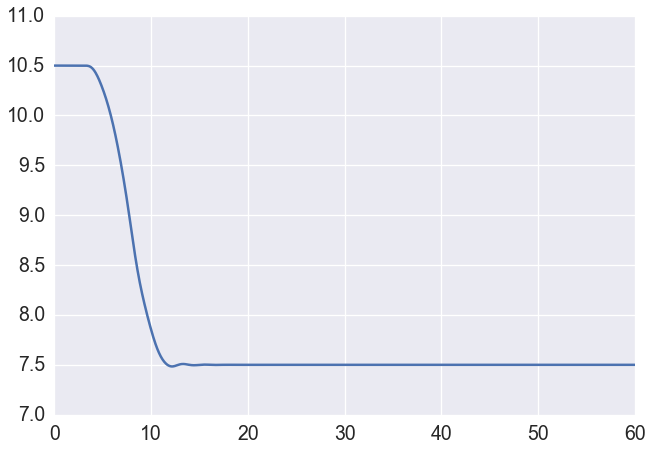

In [50]:
resp = np.genfromtxt(filepath+'response'+str(4)+'.csv', delimiter=',')
shaped = np.genfromtxt(filepath+'response_s'+str(4)+'.csv', delimiter=',')
itemindex = np.where(shaped[:,0] >= 10)
shaped_ends = itemindex[:1][0][0]

itemindex_resp = np.where(resp[:,0] >= 10)
unshaped_ends = itemindex[:1][0][0]

beta_max = np.abs(np.max(resp[:,2][unshaped_ends:]))
beta_min = np.abs(np.min(resp[:,2][unshaped_ends:]))
beta_amp = np.abs(beta_max - beta_min)

beta_shaped_max = np.abs(np.max(shaped[:,2][shaped_ends:]))
beta_shaped_min = np.abs(np.min(shaped[:,2][shaped_ends:]))
beta_shaped_amp = np.abs(beta_shaped_max - beta_shaped_min)

percent_vib = (beta_shaped_amp / beta_amp) * 100
percent_vib
# amps = np.append(amps, [(beta_amp, beta_shaped_amp)], axis=0)
# percent = np.append(percent, [percent_vib])
sim_time = np.linspace(0.0, 60, 1000)
plt.plot(sim_time, (resp[:,1]))

In [49]:
0/0

ZeroDivisionError: division by zero

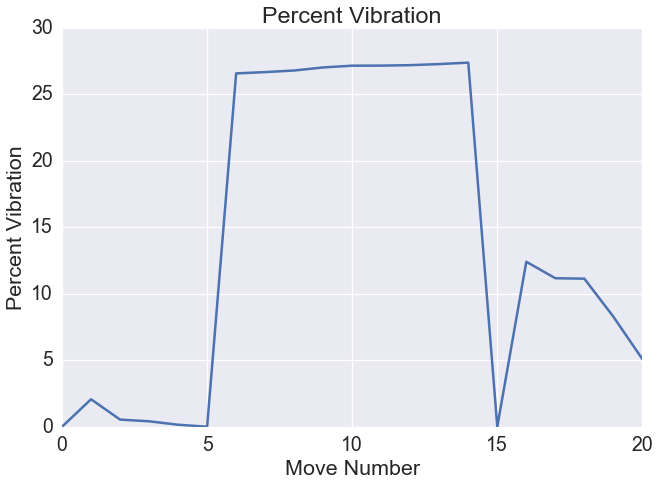

In [53]:
plt.plot(percent)
plt.title('Percent Vibration')
plt.xlabel('Move Number')
plt.ylabel('Percent Vibration')

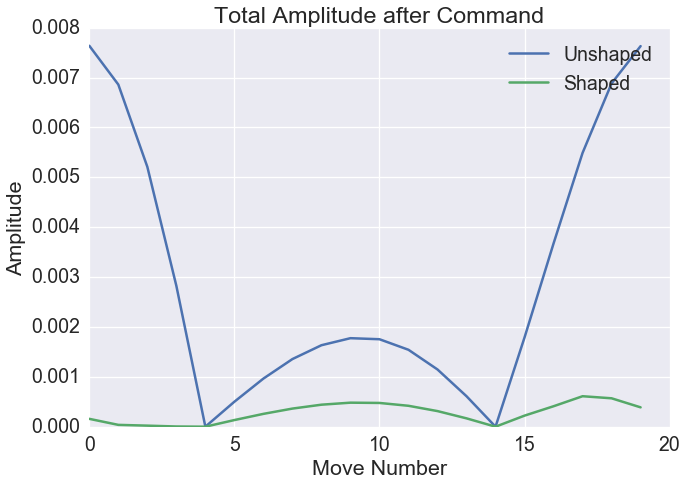

In [7]:
plt.figure(0)
plt.plot(amps[:,0], label='Unshaped')
plt.plot(amps[:,1], label='Shaped')
plt.title('Total Amplitude after Command')
plt.legend()
plt.xlabel('Move Number')
plt.ylabel('Amplitude')

In [28]:
def circle(radius, count):
    '''
    This will take a radius and an amount of points, and create coordinates around
    the center point (10, 7.5). So the radius cannot be larger than 7.5.
    '''
    
    coord = np.array([(10 + radius, 7.5)])
    origin = np.array([(10, 7.5)])
    circumfrence = 2 * np.pi * radius
    amount = circumfrence / count
    n = count
    theta = amount / radius
    for i in range(n):
        y = 7.5 - radius * np.sin(theta*i)
        x = 10 + radius * np.cos(theta*i) 
        coord = np.append([(x,y)], coord, axis=0)
    coord = np.reshape(coord, [count+1, 2])
    return coord

In [60]:
radius_of_circle = 4

number_of_points = 80

points = circle(radius_of_circle, number_of_points)

In [61]:
points[4]

array([ 13.69551813,   9.03073373])

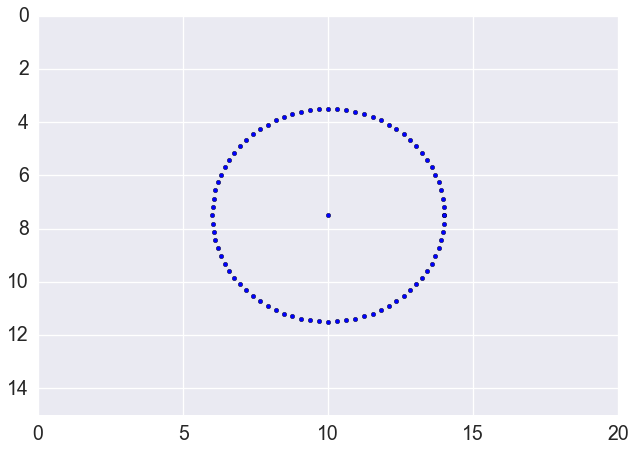

In [62]:
x = points[0:,0]
y = points[0:,1]
plt.scatter(x, y)
plt.ylim(15,0)
plt.xlim(0,20)
plt.scatter(10,7.5)

In [268]:
c = np.append([(3)], x)

In [269]:
c

array([3, 4])

In [27]:
import sympy
import math
from numpy import sqrt
Le1, Le2, x, y = sympy.symbols('Le1 Le2 x y')

In [12]:
h = 20.0
g = 9.81
k = 10.0
m = 1.0
Fx = (-k*(-Le1 + sympy.sqrt(x**2 + y**2))*x/sympy.sqrt(x**2 + y**2) +
     k*(h - x)*(-Le2 + sympy.sqrt((h - x)**2 + y**2))/sympy.sqrt((h - x)**2 + y**2))

Fy = (-k*(-Le1 + sympy.sqrt(x**2 + y**2))*y/sympy.sqrt(x**2 + y**2) +
      -k*(-Le2 + sympy.sqrt((h - x)**2 + y**2))*y/sympy.sqrt((h - x)**2 + y**2)) + m*g

In [32]:
eq = [Fx,Fy]
sympy.init_printing(use_latex='mathjax')
A, b = sympy.linear_eq_to_matrix(eq, [x, y, Le1, Le2])

In [33]:
A

⎡                   _________                                                 
⎢                  ╱  2    2                                                  
⎢10.0⋅Le₁ - 10.0⋅╲╱  x  + y                                                   
⎢────────────────────────────                                    0            
⎢           _________                                                         
⎢          ╱  2    2                                                          
⎢        ╲╱  x  + y                                                           
⎢                                                                             
⎢                                                 _________                   
⎢                                                ╱  2    2                    
⎢                              10.0⋅Le₁ - 10.0⋅╲╱  x  + y     10.0⋅Le₂ - 10.0⋅
⎢             0                ──────────────────────────── + ────────────────
⎢                                         _________ 

In [43]:
def True_length(x,y):
    '''
    This calculates the True lengths of the cables, for any given X and Y the geometric cable
    lengths will not be correct because of the spring stretch. This calculates the cable length 
    that will stretch to the X and Y position. 
    
    Y has to be above 1 or the cables cannot reach that position. 
    
    The sympy solver is very slow it would be more efficent to use numpy,
    however this only has to be run once to get the lengths so the convience of this slow 
    algebric solver is ok.
    ''' 
    h = 20.0
    g = 9.81
    k = 10.0
    m = 1.0
    
    Fx = (-k*(-Le1 + np.sqrt(x**2 + y**2))*x/np.sqrt(x**2 + y**2) + 
         k*(h - x)*(-Le2 + np.sqrt((h - x)**2 + y**2))/np.sqrt((h - x)**2 + y**2))
    
    Fy = (-k*(-Le1 + np.sqrt(x**2 + y**2))*y/np.sqrt(x**2 + y**2) + 
          -k*(-Le2 + np.sqrt((h - x)**2 + y**2))*y/np.sqrt((h - x)**2 + y**2)) + m*g
    
    solution = sympy.solvers.solve([Fx,Fy])
    L1d = solution[Le1] 
    L2d = solution[Le2]
    L1 = round(L1d,4)
    L2 = round(L2d,4)
    return L1, L2

In [44]:
True_length(10,7.5)

(11.6825, 11.6825)